# **Lab Manual 11**
This lab manual covers three essential data transformation techniques:

1. **Principal Component Analysis (PCA)**
2. **Feature/Label Encoding**
3. **Normalization/Standardization**



## Necessary Libraries

In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## **Part 1: Principal Component Analysis (PCA)**
### **Objective**
Principal Component Analysis (PCA) is a simple **dimensionality reduction** (i.e. Reducing Number of features/Columns) technique that can capture linear correlations between the features. For a given (standardized) data, PCA can be calculated by eigenvalue decomposition of covariance (or correlation) matrix of the data, or Singular Value Decomposition (SVD) of the data matrix. The data standardization includes mean removal and variance normalization.

In [52]:
# Load the Iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["species"] = y
pca_df.head()

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


## PCA Transformation:


```
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

```

**n_components=2**: specifies that we want to reduce the dataset to 2 dimensions (2 principal components).

The **fit_transform** method finds the principal components and transforms the original data into a new 2-dimensional space.

The resulting **X_pca** is a transformed dataset where each data point is represented by its projections on the first two principal components (PC1 and PC2).



## Interpretation of Principal Components
- Principal Component 1 (PC1) captures the direction of maximum variance in the data. This means that PC1 is the linear combination of the original features that explains the most variation in the dataset.

- Principal Component 2 (PC2) captures the second highest variance, orthogonal (at a right angle) to PC1. It explains the next highest amount of variance that is not captured by PC1.

By reducing the data to these two components, we preserve as much of the original data's variance as possible while reducing dimensionality.

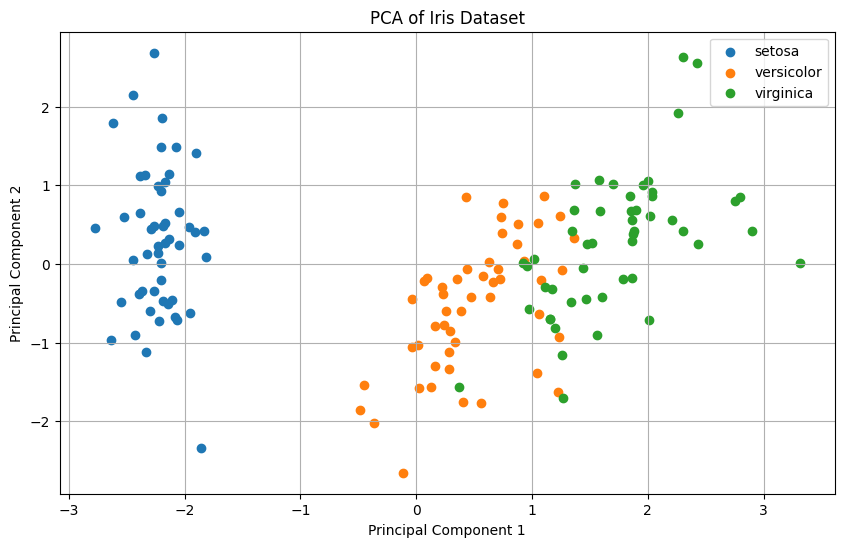

In [55]:
# Visualize the PCA result
plt.figure(figsize=(10, 6))
for species in np.unique(y):
    subset = pca_df[pca_df["species"] == species]
    plt.scatter(subset["PC1"], subset["PC2"], label=iris.target_names[species])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()

## Analyzing the PCA Graph
### Separation of Species:
The plot shows a good separation between the species, especially Setosa, which forms a distinct cluster on the left side of the graph.

Versicolor and Virginica overlap to some extent but still form identifiable clusters.

### Variance Explained:
The spread along the x-axis (PC1) indicates that it explains the majority of the variance. The y-axis (PC2) explains less variance but still captures significant patterns in the data.


In [56]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

PC1 captures ~72% of the variance, and PC2 captures ~23%.

**Task 1:**
Try applying PCA with n_components=3. Plot the 3D scatter plot and observe the difference.



## **Part 2: Feature/Label Encoding**

To convert **categorical features into numerical representations** for machine learning models.
- **Label Encoding:** Assigns a unique numerical value to each category. It is suitable for ordinal data but may introduce unintended ordinal relationships in nominal data.
- **One-Hot Encoding:** Creates binary columns for each category. It avoids ordinal relationships and is preferred for nominal data.



In [57]:
# Create a sample dataset
data = pd.DataFrame(
    {
        "color": ["red", "blue", "green", "blue", "red"],
        "size": ["S", "M", "L", "XL", "M"],
        "price": [10.5, 15.0, 14.0, 18.5, 12.0],
    }
)
data

,color,size,price
0,red,S,10.5
1,blue,M,15.0
2,green,L,14.0
3,blue,XL,18.5
4,red,M,12.0


In [58]:
# Label Encoding for Ordinal Feature (Size)

size_mapping = {"S": 0, "M": 1, "L": 2, "XL": 3}
data["size_encoded"] = data["size"].map(size_mapping)
data

,color,size,price,size_encoded
0,red,S,10.5,0
1,blue,M,15.0,1
2,green,L,14.0,2
3,blue,XL,18.5,3
4,red,M,12.0,1


In [59]:
# One-Hot Encoding for Nominal Feature color
one_hot_encoded = pd.get_dummies(data["color"], prefix="color").astype(int)
data = pd.concat([data, one_hot_encoded], axis=1)
data

,color,size,price,size_encoded,color_blue,color_green,color_red
0,red,S,10.5,0,0,0,1
1,blue,M,15.0,1,1,0,0
2,green,L,14.0,2,0,1,0
3,blue,XL,18.5,3,1,0,0
4,red,M,12.0,1,0,0,1


Task 2:
Encode the **species** column of the iris dataset  using **OneHotEncoder from Scikit-Learn.**




## **Part 3: Normalization and Standardization**
### **Objective**
We use **Normalization and Standardization** To scale the features to a similar range, improving the performance and convergence of machine learning algorithms.

- **Normalization (Min-Max Scaling):** Scales the data to a fixed range, usually [0, 1]. It is sensitive to outliers.

- **Standardization (Z-score Normalization):** Centers the data to have a mean of 0 and a standard deviation of 1. It is robust against outliers and is preferred for algorithms like PCA and K-means clustering.

In [60]:
# Create a sample dataset
df = pd.DataFrame(
    {"feature1": [10, 20, 30, 40, 50], "feature2": [100, 200, 300, 400, 500]}
)
df

,feature1,feature2
0,10,100
1,20,200
2,30,300
3,40,400
4,50,500


In [61]:
# Apply Min-Max Normalization
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
df_normalized

,feature1,feature2
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


In [62]:
# Apply Standardization
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
df_standardized

,feature1,feature2
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


### Visualize the Effects of Scaling


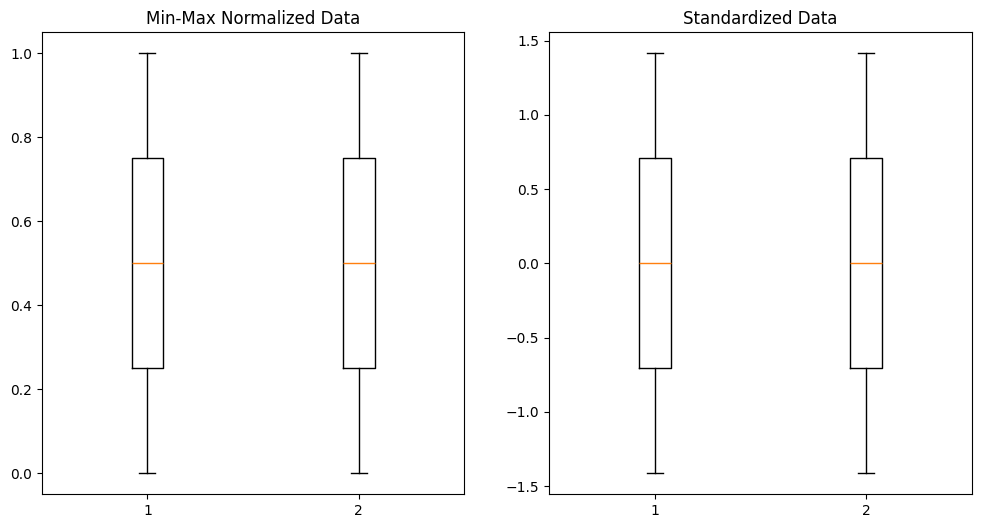

In [63]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_normalized.values)
plt.title("Min-Max Normalized Data")

plt.subplot(1, 2, 2)
plt.boxplot(df_standardized.values)
plt.title("Standardized Data")

plt.show()

## **Use the dataset "Train.csv" to complete the following task**

In [64]:
# Load data
df = pd.read_csv("Train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Task 1. Data Cleaning**
- Check for any missing values in the dataset and handle them appropriately:
- Fill missing values for numerical columns using the mean or median.
- Fill missing values for categorical columns with the most frequent value or using forward fill.

In [65]:
# TASK
missing_values = df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [66]:
df = df.drop(columns=["Cabin"])
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
print("Number of missing values after imputation:")
print(df.isnull().sum())

Number of missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_15376\1849124402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_15376\1849124402.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

### **Task 2: Feature/Label Encoding**
Perform encoding on the categorical features:
- Use **sklearn label encoding** for the Sex column.
- Use  sklearn one-hot encoding for the Embarked column. Make sure to handle cases where missing values are present.


In [67]:
# TASK
size_mapping = {"female": 0, "male": 1}
df["gender_encoded"] = df["Sex"].map(size_mapping)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [68]:
one_hot_encoded = pd.get_dummies(df["Embarked"], prefix="embarked").astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender_encoded,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1


### **Task 3: Normalization/Standardization**
Normalize or standardize the numerical features (**Age, Fare**):
- Use standardization to transform these columns to have a mean of 0 and a standard deviation of 1.
- Explain when it is more appropriate to use normalization versus standardization

In [69]:
# TASK

num_cols = ["Age", "Fare"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender_encoded,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.565736,1,0,A/5 21171,-0.502445,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.663861,1,0,PC 17599,0.786845,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.258337,0,0,STON/O2. 3101282,-0.488854,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,1,0,113803,0.420730,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0.433312,0,0,373450,-0.486337,S,1,0,0,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Embarked        891 non-null    object 
 11  gender_encoded  891 non-null    int64  
 12  embarked_C      891 non-null    int64  
 13  embarked_Q      891 non-null    int64  
 14  embarked_S      891 non-null    int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 104.5+ KB


### **Task 4: Principal Component Analysis (PCA)**
Apply PCA to reduce the dimensionality of the dataset:
- Use only numerical features (including transformed features) for PCA.
- Reduce the data to 2 principal components and create a scatter plot colored by the Survived column.
- Explain the variance captured by each component and interpret the results.

In [71]:
# TASK
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_numeric = X.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Survived"] = y
pca_df.head()

,PC1,PC2,Survived
0,-1.443387,0.045093,0
1,3.294636,-0.055987,1
2,-0.931703,0.099519,1
3,0.607569,0.930943,1
4,-1.262097,-0.641105,0


In [72]:
pca.explained_variance_ratio_

array([0.21555269, 0.17680307])

PC1 captures ~22% of the variance, and PC2 captures ~18%.

### **Task 5: Exploratory Data Analysis (EDA)**
- Visualize the relationship between the principal components and survival status by Creating a scatter plot of the principal components (PC1 vs. PC2).

- Add labels and a legend for better interpretation.

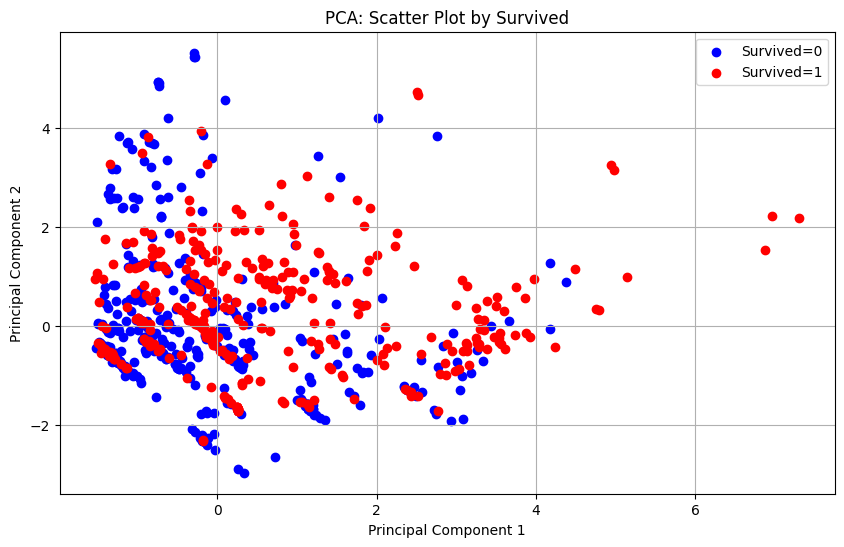

In [73]:
# TASK
plt.figure(figsize=(10, 6))
for survival_status in np.unique(y):
    subset = pca_df[pca_df["Survived"] == survival_status]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        label=f"Survived={survival_status}",
        color="red" if survival_status == 1 else "blue",
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Scatter Plot by Survived")
plt.legend()
plt.grid(True)
plt.show()